In [1]:
from fastai.vision import *
from fastai.imports import *
import numpy as np
import os

In [2]:
path = Path('downloads')

In [3]:
np.random.seed(42)

In [4]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4,bs=4).normalize(imagenet_stats)

In [5]:
data.classes

['banana', 'lemon']

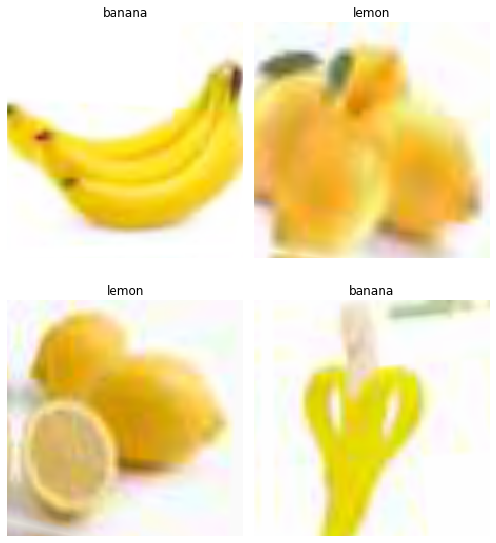

In [6]:
data.show_batch(rows=3, figsize=(7,8))

In [7]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['banana', 'lemon'], 2, 78, 19)

In [8]:
path = Path('downloads')

In [9]:
print(path)

downloads


In [11]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.891744,0.428119,0.157895,00:35
1,0.842136,0.244222,0.052632,00:29
2,0.731936,0.317666,0.157895,00:30
3,0.664349,0.293044,0.105263,00:29


In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [16]:
learn.fit_one_cycle(2, max_lr=slice(3e-8,3e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.525697,0.325679,0.210526,00:28
1,0.584409,0.247399,0.105263,00:29


In [17]:
learn.save('stage-2')

In [18]:
learn.export()

In [19]:
learn = load_learner(path)

In [23]:
img = open_image(path/'lemon'/'lemon0.jpg')

In [24]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category lemon